RETRIEVING FEATURE VECTOR FROM TEXT- MODEL

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')
from nltk.corpus import wordnet
import random
import re
nltk.download('punkt')
nltk.download('stopwords')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#TEXT DATASET
df = pd.read_excel(r'train_f.xlsx')


In [ ]:
#AUDIO FEATURE VECTOR
data2=pd.read_excel(r'X_f.xlsx')

In [ ]:
type(data2)

pandas.core.frame.DataFrame

In [ ]:
df.head()

,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my company’s tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You must’ve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So let’s talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


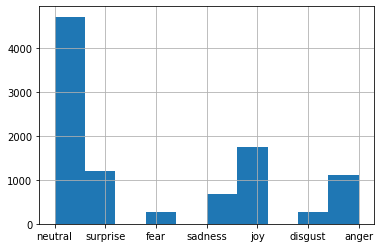

In [ ]:
df.Emotion.hist()
plt.show()

In [ ]:
df.Emotion.value_counts()

neutral     4709
joy         1743
surprise    1205
anger       1109
sadness      683
disgust      271
fear         268
Name: Emotion, dtype: int64

In [ ]:
def LabelFunc(rating):
    if rating == 'neutral':
        return 0
    elif rating == 'anger':
        return 1
    elif rating == 'disgust':
        return 2
    elif rating == 'fear':
        return 3
    elif rating == 'joy':
        return 4
    elif rating == 'sadness':
        return 5
    elif rating == 'surprise':
        return 6  

df['Label'] = df['Emotion'].apply(LabelFunc)    

In [ ]:
df = df[['Utterance','Emotion','Label']]

In [ ]:
df.head()

,Utterance,Emotion,Label
0,also I was the point person on my company’s tr...,neutral,0
1,You must’ve had your hands full.,neutral,0
2,That I did. That I did.,neutral,0
3,So let’s talk a little bit about your duties.,neutral,0
4,My duties? All right.,surprise,6


In [ ]:
appos = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not"
}

In [ ]:
def clean_text(words):
    words = re.sub(r'http\S+', '', str(words))
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed if word not in set(stop_words)]
    reformed = [word for word in reformed if len(word) > 2]
    #reformed = ' '.join(reformed)
    return reformed

df['CleanText'] = df['Utterance'].apply(clean_text)

In [ ]:
def clean_text(words):
    #words = re.sub(r'http\S+', '', words)
    words=str(words)
    words = words.lower()
    words = word_tokenize(words)
    words = [word for word in words if word.isalpha()]
    reformed = [appos[word] if word in appos else word for word in words]
    reformed = [lemmatizer.lemmatize(word) for word in reformed]
    #reformed = [word for word in reformed if len(word) > 2]
    #reformed = ' '.join(reformed)
    return reformed

df['CleanText_2'] = df['Utterance'].apply(clean_text)

In [ ]:
df.head()

,Utterance,Emotion,Label,CleanText,CleanText_2
0,also I was the point person on my company’s tr...,neutral,0,"[also, point, person, company, transition, sys...","[also, i, wa, the, point, person, on, my, comp..."
1,You must’ve had your hands full.,neutral,0,"[must, hand, full]","[you, must, ve, had, your, hand, full]"
2,That I did. That I did.,neutral,0,[],"[that, i, did, that, i, did]"
3,So let’s talk a little bit about your duties.,neutral,0,"[let, talk, little, bit, duty]","[so, let, s, talk, a, little, bit, about, your..."
4,My duties? All right.,surprise,6,"[duty, right]","[my, duty, all, right]"


In [ ]:
np.shape(df)

(9988, 5)

In [ ]:
np.shape(df)

(9988, 5)

In [ ]:
all_words = []

for sentence in df['CleanText_2']:
    for word in sentence:
        all_words.append(word)

In [ ]:
len(all_words)

81628

In [ ]:
all_words = nltk.FreqDist(all_words)

In [ ]:
word_features = list(all_words.keys())[:3000]


In [ ]:
def find_features(document):
    words = set(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features    

In [ ]:

featuresets = []
for i in range(0,9988):
    featuresets.append(find_features(df['CleanText'][i]))
    

In [ ]:
featuresets[featuresets is 'True']=1


In [ ]:
p=[]
for i in range(0,9988):
    p.append(find_features(df['CleanText'][i]))

In [ ]:
pt = pd.DataFrame.from_dict(p)

In [ ]:
pt.head

<bound method NDFrame.head of        also      i     wa    the  ...  clunked  massager  reach  originated
0      True  False  False  False  ...    False     False  False       False
1     False  False  False  False  ...    False     False  False       False
2     False  False  False  False  ...    False     False  False       False
3     False  False  False  False  ...    False     False  False       False
4     False  False  False  False  ...    False     False  False       False
...     ...    ...    ...    ...  ...      ...       ...    ...         ...
9983  False  False  False  False  ...    False     False  False       False
9984  False  False  False  False  ...    False     False  False       False
9985  False  False  False  False  ...    False     False  False       False
9986  False  False  False  False  ...    False     False  False       False
9987  False  False  False  False  ...    False     False  False       False

[9988 rows x 3000 columns]>

In [ ]:
data2.head

<bound method NDFrame.head of                A           B          C  ...         W         X         Y
0    -255.351929   82.432297 -10.847765  ... -7.736582 -0.853770 -2.403830
1    -314.422607   76.624565   3.267509  ... -1.671536 -1.834447 -6.261665
2    -337.287720   85.001938 -13.733443  ... -5.338048  0.575601 -2.645268
3    -314.957336   67.251106  -3.459231  ... -6.623580  0.969543 -5.293625
4    -242.165955  108.606956 -50.430260  ... -3.616937 -0.453000 -4.522639
...          ...         ...        ...  ...       ...       ...       ...
9983 -320.050293  103.394821  -8.692819  ... -1.575685  0.152027 -4.704655
9984 -316.432007  125.600075 -13.504161  ...  1.186057  2.564477 -6.105402
9985 -254.105469  124.081856 -26.436478  ... -3.156023  0.023220 -3.793784
9986 -195.453934  106.463409 -48.479904  ... -4.375590 -0.210245 -3.489197
9987 -258.105988  120.356956 -17.230938  ... -5.895321 -2.544011 -4.447517

[9988 rows x 25 columns]>

DATA PRE-PROCESSING

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#dfTest = pd.DataFrame(
#for col in cols_to_scale:

data2[:] = pd.DataFrame(scaler.fit_transform(pd.DataFrame(data2[:])),columns=cols_to_scale)

In [ ]:
datta2 = pd.DataFrame(data = data2,columns = cols_to_scale)

In [ ]:
datta2.head

<bound method NDFrame.head of        A         B         C         D  ...         V         W         X         Y
0    NaN  0.599027  0.543394  0.736981  ...  0.552029  0.279050  0.352136  0.477939
1    NaN  0.561472  0.659028  0.654776  ...  0.492100  0.464022  0.314978  0.340280
2    NaN  0.615643  0.519754  0.571349  ...  0.455221  0.352200  0.406296  0.469324
3    NaN  0.500859  0.603922  0.661023  ...  0.534318  0.312994  0.421223  0.374823
4    NaN  0.768282  0.219128  0.405348  ...  0.482769  0.404691  0.367322  0.402334
...   ..       ...       ...       ...  ...       ...       ...       ...       ...
9983 NaN  0.734578  0.561047  0.526931  ...  0.549023  0.466945  0.390247  0.395839
9984 NaN  0.878166  0.521632  0.626588  ...  0.542494  0.551173  0.481657  0.345856
9985 NaN  0.868349  0.415688  0.538533  ...  0.433941  0.418748  0.385366  0.428341
9986 NaN  0.754421  0.235105  0.488357  ...  0.480681  0.381553  0.376520  0.439210
9987 NaN  0.844262  0.491102  0.595774  ...  0

In [ ]:
data3=pd.concat([datta2,pt],ignore_index=True,axis=1)


In [ ]:
ddl=datta2.iloc[:,1:].values
ptdl=pt.iloc[:,:].values

In [ ]:
data3.head

<bound method NDFrame.head of       0         1         2         3     ...   3021   3022   3023   3024
0      NaN  0.599027  0.543394  0.736981  ...  False  False  False  False
1      NaN  0.561472  0.659028  0.654776  ...  False  False  False  False
2      NaN  0.615643  0.519754  0.571349  ...  False  False  False  False
3      NaN  0.500859  0.603922  0.661023  ...  False  False  False  False
4      NaN  0.768282  0.219128  0.405348  ...  False  False  False  False
...    ...       ...       ...       ...  ...    ...    ...    ...    ...
9983   NaN  0.734578  0.561047  0.526931  ...  False  False  False  False
9984   NaN  0.878166  0.521632  0.626588  ...  False  False  False  False
9985   NaN  0.868349  0.415688  0.538533  ...  False  False  False  False
9986   NaN  0.754421  0.235105  0.488357  ...  False  False  False  False
9987   NaN  0.844262  0.491102  0.595774  ...  False  False  False  False

[9988 rows x 3025 columns]>

In [ ]:
data_d= data3.iloc[:,1:].values
type(data_d)


numpy.ndarray

In [ ]:
(data_d[0][0])

0.5990265705167975

In [ ]:
y=pd.DataFrame.from_dict(df['Label'])
yy=y.iloc[:,:].values
type(yy)

numpy.ndarray

In [ ]:
yyy=np.array(y)
yyy[0:2]

array([[0],
       [0]])

In [ ]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(data_d,
                                                          yy,
                                                          test_size=0.199,
                                                          random_state=0)

In [ ]:
np.shape(test)

SVM CLASSIFIER

In [ ]:
from sklearn import svm 
clfb = svm.SVC(kernel='rbf')
clfb.fit(train,train_labels)



/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_predb=clfb.predict(test)
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_labels, y_predb))
cmb=confusion_matrix(test_labels,y_predb)
cmb

Accuracy: 0.5005030181086519


array([[887,   0,   0,   0,  16,   8,   3],
       [240,   1,   0,   0,   3,   2,   3],
       [ 49,   0,   0,   0,   1,   0,   3],
       [ 55,   0,   0,   0,   1,   2,   4],
       [296,   0,   0,   0,  49,   1,   7],
       [111,   1,   0,   0,   6,  14,   2],
       [173,   0,   0,   0,   4,   2,  44]])

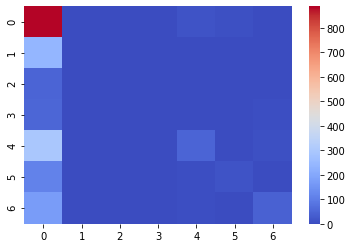

In [ ]:
import seaborn as sns
sns.heatmap(cmb,cmap="coolwarm")

K NEAREST NEIGHBOURS

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)

# Train the model using the training sets
model.fit(train,train_labels)

#Predict Output
predicted= model.predict(test) # 0:Overcast, 2:Mild
print(predicted)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


[0 0 0 ... 0 0 0]


In [ ]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels, predicted))
cmb=confusion_matrix(test_labels,predicted)
cmb

Accuracy: 0.4783702213279678


array([[796,  17,   1,   1,  40,   8,  51],
       [196,  10,   1,   0,  18,   0,  24],
       [ 47,   2,   0,   0,   0,   0,   4],
       [ 50,   1,   0,   1,   1,   2,   7],
       [257,   9,   0,   1,  62,   1,  23],
       [ 99,   4,   1,   0,   5,   7,  18],
       [135,   4,   0,   0,   6,   3,  75]])

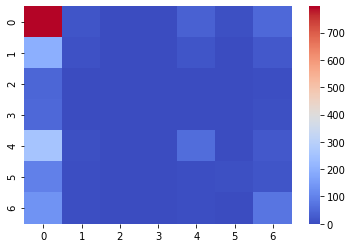

In [ ]:
sns.heatmap(cmb,cmap="coolwarm")

MULTINOMIAL NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nbclf = MultinomialNB()
nbclf.fit(train,train_labels)
MultinomialNB()
prenb=nbclf.predict(test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
print("Accuracy:",metrics.accuracy_score(test_labels, prenb))
cmb=confusion_matrix(test_labels,prenb)
cmb

Accuracy: 0.48541247484909456


array([[840,  22,   0,   0,  35,   5,  12],
       [215,   9,   0,   0,   9,   2,  14],
       [ 44,   1,   0,   0,   3,   0,   5],
       [ 55,   1,   0,   0,   2,   0,   4],
       [266,   2,   0,   0,  75,   5,   5],
       [107,   6,   0,   0,  11,   3,   7],
       [172,   4,   0,   0,   8,   1,  38]])

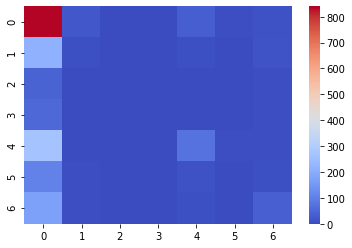

In [ ]:
import seaborn as sns
sns.heatmap(cmb,cmap="coolwarm")

DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=8)

# Train Decision Tree Classifer
clf = clf.fit(train,train_labels)

#Predict the response for test dataset
y_pred = clf.predict(test)
print("Accuracy:",metrics.accuracy_score(test_labels, y_pred))

Accuracy: 0.4768611670020121


In [ ]:
cmb=confusion_matrix(test_labels,y_pred)
cmb

array([[883,  11,   0,   0,  13,   5,   2],
       [236,   8,   0,   0,   2,   1,   2],
       [ 48,   2,   0,   0,   1,   0,   2],
       [ 54,   4,   0,   0,   1,   1,   2],
       [311,   6,   0,   0,  27,   1,   8],
       [118,   3,   0,   0,   6,   4,   3],
       [179,   7,   0,   0,   5,   6,  26]])

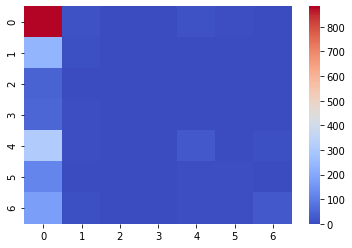

In [ ]:
sns.heatmap(cmb,cmap="coolwarm")

BOOSTING TECHNIQUE-XGBOOST


In [ ]:
np.shape(train)

In [ ]:
#trying to apply XGBOOST

#pip install xgboost
#pip install --upgrade xgboost
import xgboost as xgb

In [ ]:

from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(train, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(test)
accuracy = accuracy_score(test_labels,y_pred)

In [ ]:
print(accuracy)
cmb=confusion_matrix(test_labels,y_pred)
cmb



0.49446680080482897


array([[870,  13,   1,   0,  23,   4,   3],
       [226,  15,   0,   0,   2,   3,   3],
       [ 46,   1,   0,   0,   2,   0,   4],
       [ 52,   5,   0,   0,   1,   0,   4],
       [280,  10,   0,   1,  50,   1,  11],
       [111,   3,   0,   0,   7,   8,   5],
       [175,   5,   0,   0,   1,   2,  40]])

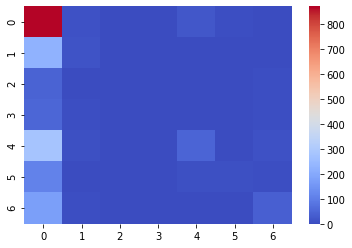

In [ ]:
sns.heatmap(cmb,cmap="coolwarm")

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0, random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=8, random_state=0)
clf.fit(train, train_labels)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
pred=clf.predict(test)
accuracy = accuracy_score(test_labels,pred)

In [ ]:
print(accuracy)
cmb=confusion_matrix(test_labels,pred)
cmb


0.4597585513078471


array([[914,   0,   0,   0,   0,   0,   0],
       [249,   0,   0,   0,   0,   0,   0],
       [ 53,   0,   0,   0,   0,   0,   0],
       [ 62,   0,   0,   0,   0,   0,   0],
       [353,   0,   0,   0,   0,   0,   0],
       [134,   0,   0,   0,   0,   0,   0],
       [223,   0,   0,   0,   0,   0,   0]])

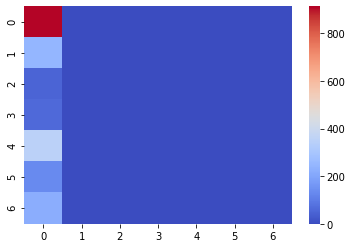

In [ ]:
sns.heatmap(cmb,cmap="coolwarm")

Trying to apply 2nd approach-CNN MODEL


In [ ]:
import numpy as np
import os
import sys

import wave
import copy
import math

from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import LSTM, Input, Flatten, Embedding, Convolution1D,Dropout
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import Conv2D
from keras.layers import add, concatenate,Concatenate
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import label_binarize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence


In [ ]:
model_text = Sequential()
#model.add(Embedding(2737, 128, input_length=MAX_SEQUENCE_LENGTH))
model_text.add(Embedding(2736,
                    128,input_length=500))
model_text.add(Flatten())
model_text.add(Dense(1024))
model_text.add(Activation('relu'))
model_text.add(Dropout(0.2))
model_text.add(Dense(512))
model_text.add(Activation('relu'))
model_text.add(Dropout(0.2))
model_text.add(Dense(256))



model_speech = Sequential()
model_speech.add(Flatten(input_shape=(100, 34)))
model_speech.add(Dense(1024))
model_speech.add(Activation('relu'))
model_speech.add(Dropout(0.2))
model_speech.add(Dense(512))
model_speech.add(Activation('relu'))
model_speech.add(Dropout(0.2))
model_speech.add(Dense(256))


model_combined = Sequential()
#model_combined.add(concatenate([model_text, model_speech]))
merged = Concatenate([model_text, model_speech])
model_combined.add(merged)

model_combined.add(Activation('relu'))
model_combined.add(Dense(256))
model_combined.add(Activation('relu'))

model_combined.add(Dense(4))
model_combined.add(Activation('softmax'))

#sgd = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model_combined.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['acc'])

## compille it here according to instructions

#model.compile()
model_speech.summary()
model_text.summary()
#model_combined.summary()

print("Model1 Built")

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_15 (Flatten)         (None, 3400)              0         
_________________________________________________________________
dense_47 (Dense)             (None, 1024)              3482624   
_________________________________________________________________
activation_33 (Activation)   (None, 1024)              0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               524800    
_________________________________________________________________
activation_34 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)             

In [ ]:
hist = model_combined.fit([ptdl,ddl], yy, 
                 batch_size=64, epochs=60, verbose=1, 
                 validation_split=0.2)